In [19]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
RESULTS_DATABASE_NAME = '/Users/darylwilding-mcbride/Downloads/experiments/P3830/summarised-results/results.sqlite'

In [21]:
db_conn = sqlite3.connect(RESULTS_DATABASE_NAME)
results_df = pd.read_sql_query("select * from sequences", db_conn)
db_conn.close()

In [22]:
# convert the identifications from JSON to Python objects
results_df['identifications_d'] = results_df.apply(lambda row: json.loads(row.identifications), axis=1)

In [92]:
# separate some key metrics into separate columns
results_df['id_perc_q_value'] = results_df.apply(lambda row: row.identifications_d['perc_q_value'], axis=1)
results_df['id_count_all_runs'] = results_df.apply(lambda row: len(row.identifications_d['run_names']), axis=1)
results_df['id_protein_count'] = results_df.apply(lambda row: row.identifications_d['number_of_proteins'], axis=1)
results_df['id_protein'] = results_df.apply(lambda row: row.identifications_d['proteins'][0], axis=1)
results_df['yeast'] = results_df.apply(lambda row: 'YEAST' in row.id_protein.upper(), axis=1)

In [93]:
# remove the results that couldn't be extracted or were not classified as a target
results_df = results_df[results_df.extractions.notnull()].copy()

In [94]:
# convert from JSON to Python objects
results_df['extractions_l'] = results_df.apply(lambda row: json.loads(row.extractions), axis=1)

In [95]:
results_df.sample(n=10)

,sequence,charge,identifications,extractions,identifications_d,id_perc_q_value,id_count_all_runs,extractions_l,id_protein_count,id_protein,yeast
11493,VGVQVAAQHNTSVFYGLPQEK,2,"{""perc_q_value"": 0.00036257525999999995, ""run_...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 0.00036257525999999995, 'run_...",0.000363,1,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,sp|Q02642|NACB1_YEAST,True
10798,TLSDYNIQK,1,"{""perc_q_value"": 3.3336852e-05, ""run_names"": [...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 3.3336852e-05, 'run_names': [...",0.000033,18,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,"P62988ups|UBIQ_HUMAN_UPS,sp|P0CH08|RL40A_YEAST...",True
2396,ENNEDLTEEQSEIKK,2,"{""perc_q_value"": 4.1408296e-05, ""run_names"": [...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 4.1408296e-05, 'run_names': [...",0.000041,4,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,sp|P38523|GRPE_YEAST,True
12516,YNSDPYQLEQSLYHK,3,"{""perc_q_value"": 5.880243e-06, ""run_names"": [""...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 5.880243e-06, 'run_names': ['...",0.000006,20,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,sp|P53090|ARO8_YEAST,True
11209,VADALTNAVAHVDDM[15.9949]PNALSALSDLHAHK,3,"{""perc_q_value"": 5.880243e-06, ""run_names"": [""...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 5.880243e-06, 'run_names': ['...",0.000006,10,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,P69905ups|HBA_HUMAN_UPS,False
10259,SYALETVSGETDDLIGYGR,2,"{""perc_q_value"": 5.880243e-06, ""run_names"": [""...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 5.880243e-06, 'run_names': ['...",0.000006,10,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,sp|P53081|NIF3_YEAST,True
1549,DSFDPEFQHLLNTITR,2,"{""perc_q_value"": 5.880243e-06, ""run_names"": [""...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 5.880243e-06, 'run_names': ['...",0.000006,20,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,sp|P28777|AROC_YEAST,True
2924,FGDSSSPAFGDLDLCGSDLIR,2,"{""perc_q_value"": 5.880243e-06, ""run_names"": [""...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 5.880243e-06, 'run_names': ['...",0.000006,9,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,sp|P53128|MTHR2_YEAST,True
5164,ISENCGRTAQPSIVR,2,"{""perc_q_value"": 0.004578743, ""run_names"": [""P...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 0.004578743, 'run_names': ['P...",0.004579,2,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,sp|P38347|EFM2_YEAST,True
10638,THPNYDVVLK,2,"{""perc_q_value"": 5.880243e-06, ""run_names"": [""...","[{""run_name"": ""P3830_YeastUPS2_04_Slot1-1_1_50...","{'perc_q_value': 5.880243e-06, 'run_names': ['...",0.000006,20,[{'run_name': 'P3830_YeastUPS2_04_Slot1-1_1_50...,1,sp|P31373|CYS3_YEAST,True


In [101]:
# how many unique proteins in the UPS group
len(results_df[(results_df.yeast == False)].id_protein.unique())

46

In [102]:
# expand the extractions to a row for each
sequences_l = []
for row in results_df.itertuples():
    for group_name in ['YeastUPS1','YeastUPS2']:
        if sum(group_name in s for s in row.identifications_d['run_names']) > 0:
            for extraction in row.extractions_l:
                if group_name in extraction['run_name']:
                    short_run_name = extraction['run_name'].split('_Slot')[0]
                    sequences_l.append((row.sequence, row.charge, row.id_perc_q_value, short_run_name, group_name, extraction['intensity'], row.id_protein, row.yeast))
sequences_df = pd.DataFrame(sequences_l, columns=['sequence', 'charge', 'id_perc_q_value', 'short_run_name', 'group','intensity','protein','yeast'])


In [103]:
sequences_df.sample(n=10)

,sequence,charge,id_perc_q_value,short_run_name,group,intensity,protein,yeast
48189,GANYDAEEMAHDDKPLYK,3,0.000006,P3830_YeastUPS2_01,YeastUPS2,32,sp|P39003|HXT6_YEAST,True
18767,DIVVDKDDADVINVDEEVTLMDWGNVIITK,3,0.000006,P3830_YeastUPS2_02,YeastUPS2,212,sp|P46655|SYEC_YEAST,True
135819,SDITNEISVKPTSSIADK,2,0.000006,P3830_YeastUPS2_10,YeastUPS2,1011,sp|P23201|SPA2_YEAST,True
77027,ITIDGATSISFDEDVAK,2,0.000168,P3830_YeastUPS1_02,YeastUPS1,616,sp|P23254|TKT1_YEAST,True
9940,ASLNDDSLHDLAALLNEDSGIAQR,3,0.000006,P3830_YeastUPS2_01,YeastUPS2,896,sp|Q12460|NOP56_YEAST,True
86243,KVADALTNAVAHVDDM[15.9949]PNALSALSDLHAHK,4,0.000006,P3830_YeastUPS2_02,YeastUPS2,834,P69905ups|HBA_HUMAN_UPS,False
67711,IDMNLMFNQPLPTSPSK,2,0.006406,P3830_YeastUPS2_06,YeastUPS2,2203,sp|Q08887|NDD1_YEAST,True
138130,SGSLSAVINTLDAETQSFK,2,0.000219,P3830_YeastUPS1_07,YeastUPS1,1047,sp|Q12019|MDN1_YEAST,True
79655,KDDFVNVAPSK,2,0.000006,P3830_YeastUPS2_04,YeastUPS2,510,sp|P38934|BFR1_YEAST,True
73074,INDHDLSHSNLK,2,0.000006,P3830_YeastUPS1_05,YeastUPS1,1343,sp|P43621|COPD_YEAST,True


In [105]:
# how many UPS proteins in the UPS2 group
len(sequences_df[(sequences_df.yeast == False) & (sequences_df.group == 'YeastUPS2')].protein.unique())

21

In [106]:
# average the intensity for a peptide in each group
group_sequences_l = []
for group_name,group_df in sequences_df.groupby(['sequence','charge','group'], as_index=False):
    intensity_mean = np.mean(group_df.intensity)
    intensity_sum = np.sum(group_df.intensity)
    protein = group_df.iloc[0].protein
    yeast = group_df.iloc[0].yeast
    group_sequences_l.append((group_name[0], group_name[1], group_name[2], intensity_mean, intensity_sum, protein, yeast))
group_sequences_df = pd.DataFrame(group_sequences_l, columns=['sequence','charge','group','intensity_mean','intensity_sum','protein','yeast'])

In [107]:
group_sequences_df.sample(n=10)

,sequence,charge,group,intensity_mean,intensity_sum,protein,yeast
15261,SLGSLTIAEPAMIAECK,2,YeastUPS1,1280.4,12804,P01127ups|PDGFB_HUMAN_UPS,False
11535,MPIELYNGDDWIGLYK,2,YeastUPS1,1007.2,10072,sp|P05374|CHO2_YEAST,True
7846,IMSKKPAVSHLHMDAVLLNDNSVKMNYQLTQK,3,YeastUPS2,391.5,3915,sp|P40965|MSH4_YEAST,True
17447,TYDDALGEVPHSFDPDNHPAFPEYPMR,3,YeastUPS2,590.7,5907,sp|P38993|FET3_YEAST,True
1599,DALLGDHSNFVR,2,YeastUPS1,1331.9,13319,sp|P11412|G6PD_YEAST,True
10690,LNSHDQIIADEYQNTNVPNIYSLGDVVGK,3,YeastUPS1,827.8,8278,sp|P41921|GSHR_YEAST,True
9081,KNSDSLVEVIDGSHDEDLK,3,YeastUPS1,1053.0,10530,sp|Q06137|YL345_YEAST,True
3114,EFGSEPSEIVDALLSK,2,YeastUPS1,867.1,8671,sp|P32660|ATC5_YEAST,True
1938,DHVGVTPLSSLSDSVTR,2,YeastUPS1,1131.9,11319,sp|Q99287|SEY1_YEAST,True
1667,DDAANILKPALSR,2,YeastUPS2,10501.1,105011,sp|P31539|HS104_YEAST,True


In [156]:
# calculate the intensity ratios
intensity_ratios_l = []
for group_name,group_df in group_sequences_df.groupby(['sequence','charge'], as_index=False):
    if len(group_df) == 2: # i.e. the sequence occurred in both groups
        UPS2_UPS1_ratio = group_df[(group_df.group == 'YeastUPS2')].iloc[0].intensity_mean / group_df[(group_df.group == 'YeastUPS1')].iloc[0].intensity_mean
        UPS2_UPS1_ratio_log10 = np.log10(UPS2_UPS1_ratio)
        UPS1_sum = group_df[(group_df.group == 'YeastUPS1')].iloc[0].intensity_sum
        UPS1_sum_log10 = np.log10(UPS1_sum)
        protein = group_df.iloc[0].protein
        yeast = group_df.iloc[0].yeast
        intensity_ratios_l.append((group_name[0], group_name[1], UPS2_UPS1_ratio_log10, UPS1_sum_log10, protein, yeast))
intensity_ratios_df = pd.DataFrame(intensity_ratios_l, columns=['sequence','charge','UPS2_UPS1_ratio_log10','UPS1_sum_log10','protein','yeast'])

In [140]:
intensity_ratios_df.sample(n=5)

,sequence,charge,UPS2_UPS1_ratio_log10,UPS1_sum_log10,protein,yeast
994,DSLDNTFVTR,1,-0.040968,3.493597,"sp|P0CX36|RS4B_YEAST,sp|P0CX35|RS4A_YEAST",True
6476,TCNVLVAIEQQSPDIAQGLHYEK,3,-0.079545,3.969463,sp|P19358|METK2_YEAST,True
5589,Q[-17.0265]PHIFNNPK,2,0.005786,3.823083,"sp|P0CX48|RS11B_YEAST,sp|P0CX47|RS11A_YEAST",True
6965,TWSIPVAALIIEPIQSEGGDNHASK,3,-0.024214,3.695044,sp|P17649|GABAT_YEAST,True
4099,LHATTDEEVKEK,2,-0.099939,3.003029,sp|P40066|GLE2_YEAST,True


In [141]:
yeast_df = intensity_ratios_df[(intensity_ratios_df.yeast == True)]
ups_df = intensity_ratios_df[(intensity_ratios_df.yeast == False)]

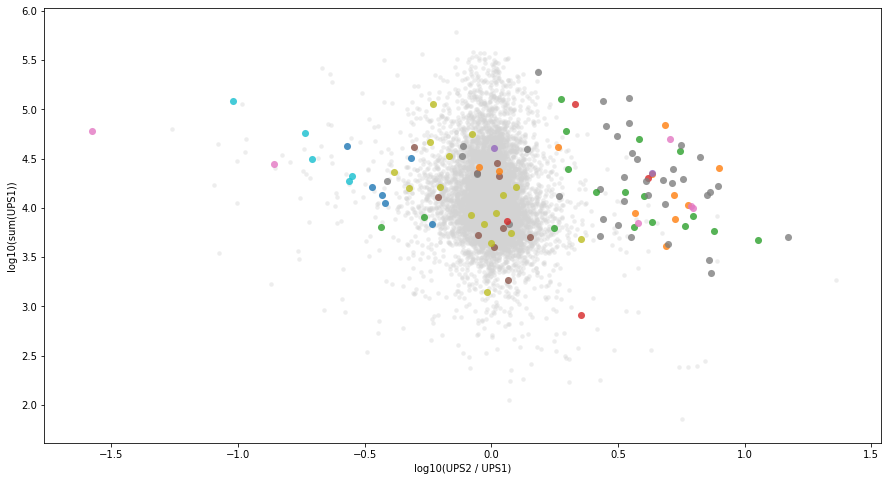

In [154]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
# plt.title('Peptide sequence mass error by RT before recalibration ({}, max q-value {})'.format(percolator_index_run_name,MAXIMUM_Q_VALUE))

ax.scatter(yeast_df.UPS2_UPS1_ratio_log10, yeast_df.UPS1_sum_log10, marker='o', color='lightgrey', lw=0, s=20, alpha=0.4)
for group_name,group_df in ups_df.groupby(['protein'], as_index=False):
    ax.scatter(group_df.UPS2_UPS1_ratio_log10, group_df.UPS1_sum_log10, marker='o', lw=0, s=50, alpha=0.8)

plt.xlabel('log10(UPS2 / UPS1)')
plt.ylabel('log10(sum(UPS1))')
# plt.xlim((300,400))
# plt.ylim((-10,+10))

plt.show()

In [151]:
len(ups_df)

115

In [157]:
# average the intensity for a peptide in each group
relative_intensities_l = []
for group_name,group_df in sequences_df.groupby(['sequence','charge'], as_index=False):
    ups1_df = group_df[group_df.group == 'YeastUPS1']
    ups2_df = group_df[group_df.group == 'YeastUPS2']
    ups1_intensity_mean = np.mean(ups1_df.intensity)
    ups2_intensity_mean = np.mean(ups2_df.intensity)
    protein = group_df.iloc[0].protein
    yeast = group_df.iloc[0].yeast
    relative_intensities_l.append((group_name[0], group_name[1], ups1_intensity_mean, ups2_intensity_mean, protein, yeast))
relative_intensities_df = pd.DataFrame(relative_intensities_l, columns=['sequence','charge','ups1_intensity_mean','ups2_intensity_mean','protein','yeast'])

In [158]:
relative_intensities_yeast_df = relative_intensities_df[relative_intensities_df.yeast == True]
relative_intensities_ups_df = relative_intensities_df[relative_intensities_df.yeast == False]

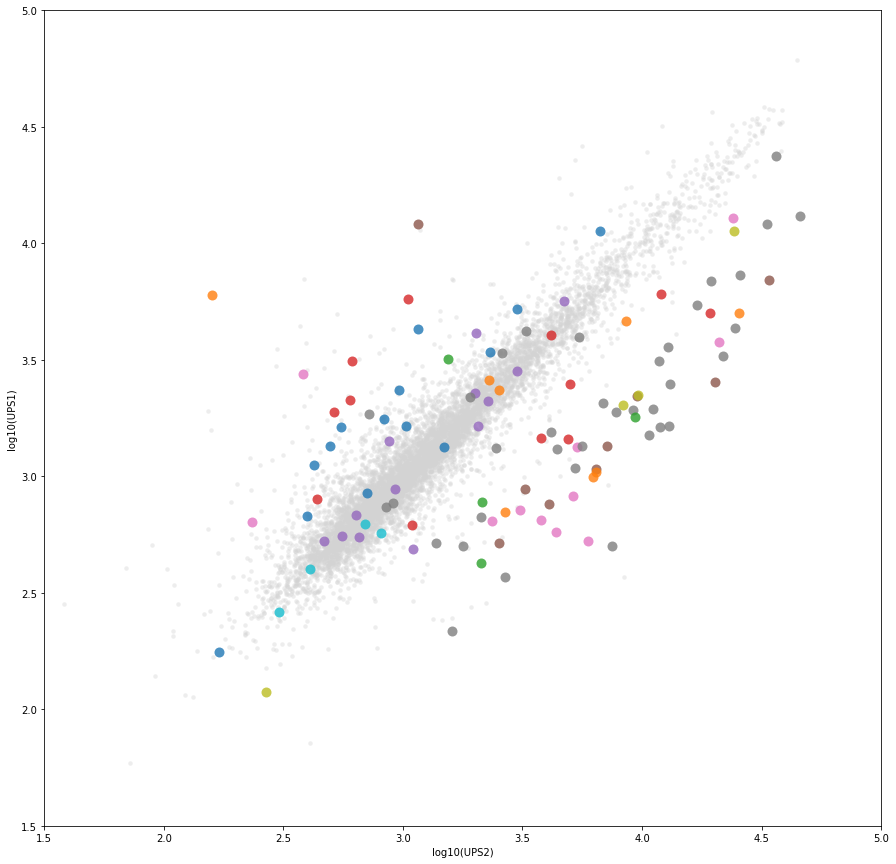

In [164]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)

plt.margins(0.06)
# plt.title('Peptide sequence mass error by RT before recalibration ({}, max q-value {})'.format(percolator_index_run_name,MAXIMUM_Q_VALUE))

ax.scatter(np.log10(relative_intensities_yeast_df.ups2_intensity_mean), np.log10(relative_intensities_yeast_df.ups1_intensity_mean), marker='o', color='lightgrey', lw=0, s=20, alpha=0.4)
for group_name,group_df in relative_intensities_ups_df.groupby(['protein'], as_index=False):
    ax.scatter(np.log10(group_df.ups2_intensity_mean), np.log10(group_df.ups1_intensity_mean), marker='o', lw=0, s=100, alpha=0.8)

plt.xlabel('log10(UPS2)')
plt.ylabel('log10(UPS1)')

plt.xlim((1.5,5.0))
plt.ylim((1.5,5.0))

plt.show()